## TE3002B Computer Vision}
### Frequency analysis

#### Import libraries

In [1]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from skimage.util import random_noise
from skimage.transform import resize
from scipy.ndimage import uniform_filter, median_filter, gaussian_filter

# from scipy.signal import correlate2d
from scipy.ndimage import correlate, convolve
from scipy.io import loadmat

from skimage.feature import match_template
from matplotlib.patches import Rectangle
# ONly if you have jupyter themes
from jupyterthemes import jtplot
jtplot.style()

In [ ]:
#La funcion se encuentra al final del codigo 

In [2]:
plots = lambda rows=1, cols=1, figsize=(20,10): plt.subplots(rows, cols, figsize=(figsize))
GREY = plt.cm.gray

In [3]:
def imshow_gray(img, title = '', size=(10,10)):
    f, ax = plots(figsize=size)
    ax.imshow(img, cmap = GREY), ax.axis('off'),ax.set_title(title)
    plt.show()
    

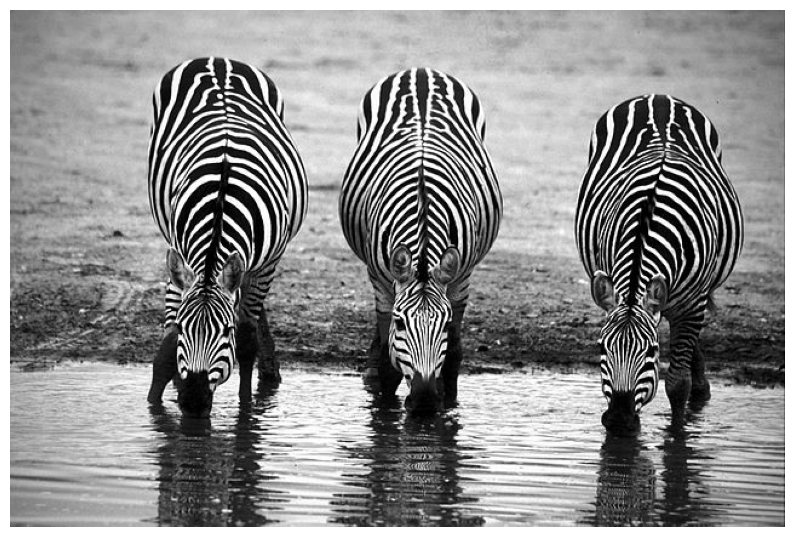

In [4]:
zebras = rgb2gray(imread('images_class/3zebras.jpg'))
imshow_gray(zebras)
plt.show()

#### Try a box filter

In [5]:
zebras.shape

(427, 640)

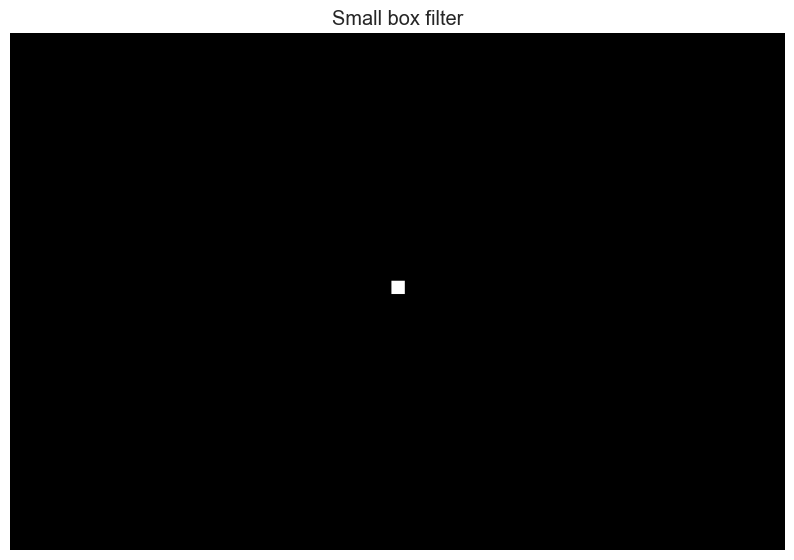

In [6]:
padded_filt = np.zeros((427, 640))
padded_filt[205:216, 315:326] = np.ones((11,11))/121
imshow_gray(padded_filt, 'Small box filter', (10,10))

In [7]:
fft_padded = fft2(padded_filt)

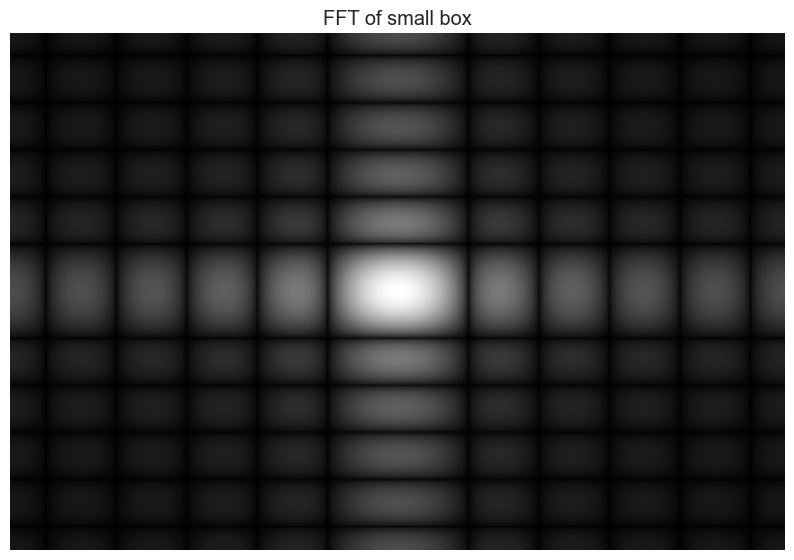

In [8]:
imshow_gray(fftshift(abs(fft_padded)**0.5), 'FFT of small box', (10,10))
#ffrShift centra el filtro que obtivimos con la segunda transformada de fourier 

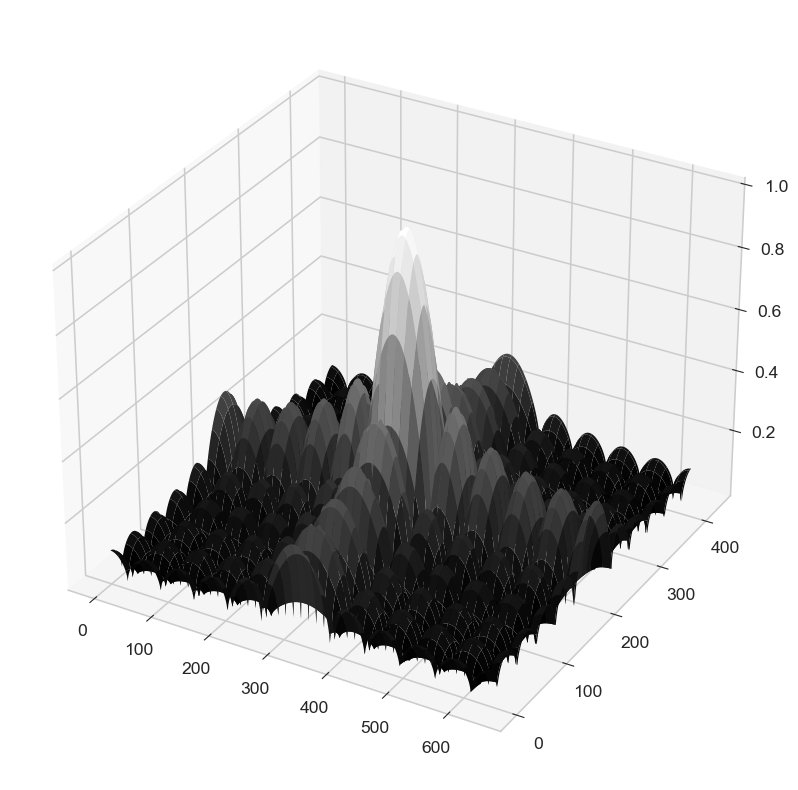

In [9]:
# try a beautiful surface plot
# %matplotlib tk
f2, ax2 = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
X, Y = np.arange(fft_padded.shape[1]), np.arange(fft_padded.shape[0])
X, Y = np.meshgrid(X, Y)
surf = ax2.plot_surface(X, Y, fftshift(abs(fft_padded)**0.5), cmap=GREY)

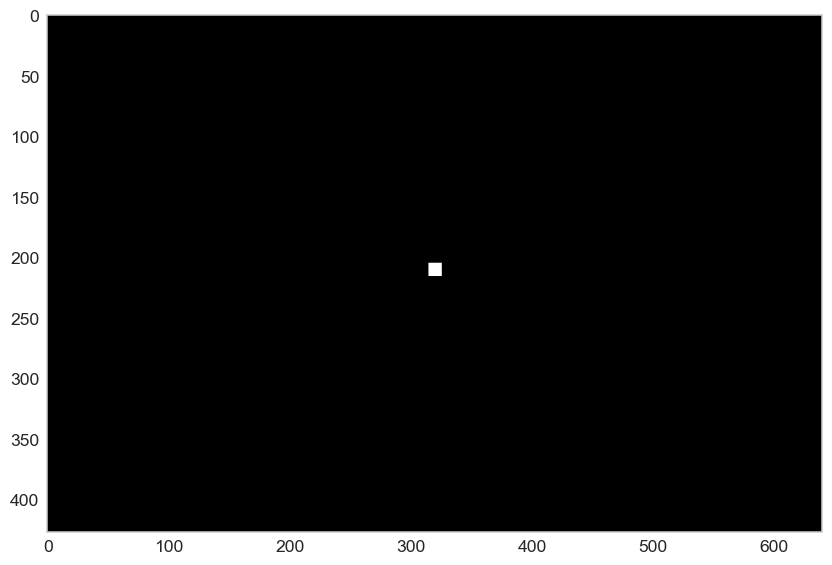

In [10]:
# IFFT
%matplotlib inline
original_back = ifft2(fft_padded).real

#abs sirve para magnitud y .real sirve para obtener solamente los valores reales 

f1, ax1 = plots(figsize=(10,10))
ax1.imshow(abs(original_back), cmap = plt.cm.gray), ax1.grid(False)
plt.show()

#### Low pass filter

In [11]:
def gaussian_filter2(size=(3,3), sigma=1):
    rows, cols = (size[0]-1)/2, (size[1]-1)/2
    [r, c] = np.mgrid[-rows:rows+1, -cols:cols+1]
    squares = r**2 + c**2
    f = np.exp(-squares/(2*sigma**2))
    #add extra axis for color filter, not needed for grayscale
    return f/f.sum()

In [12]:
zebras = rgb2gray(imread('images_class/3zebras.jpg'))
zebras = zebras[:, 115:542]
zebras = resize(zebras, (251,251))
zebras.shape

(251, 251)

In [13]:
fft2_zebras = (fft2(zebras))

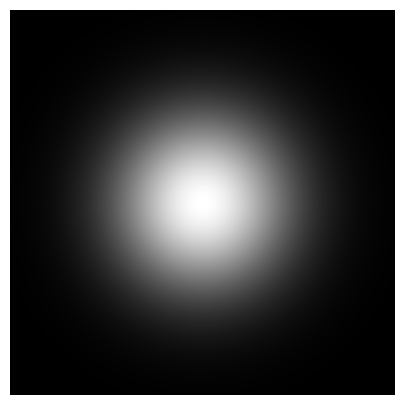

In [14]:
filt1 = gaussian_filter2(fft2_zebras.shape, sigma=40)
imshow_gray(filt1, size=(5,5))

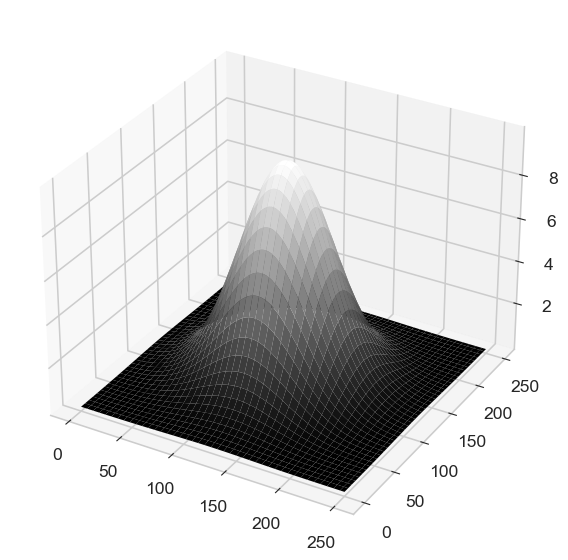

In [15]:
f2, ax2 = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(7,7))
X, Y = np.arange(filt1.shape[1]), np.arange(filt1.shape[0])
X, Y = np.meshgrid(X, Y)
surf = ax2.plot_surface(X, Y, (filt1), cmap=GREY)

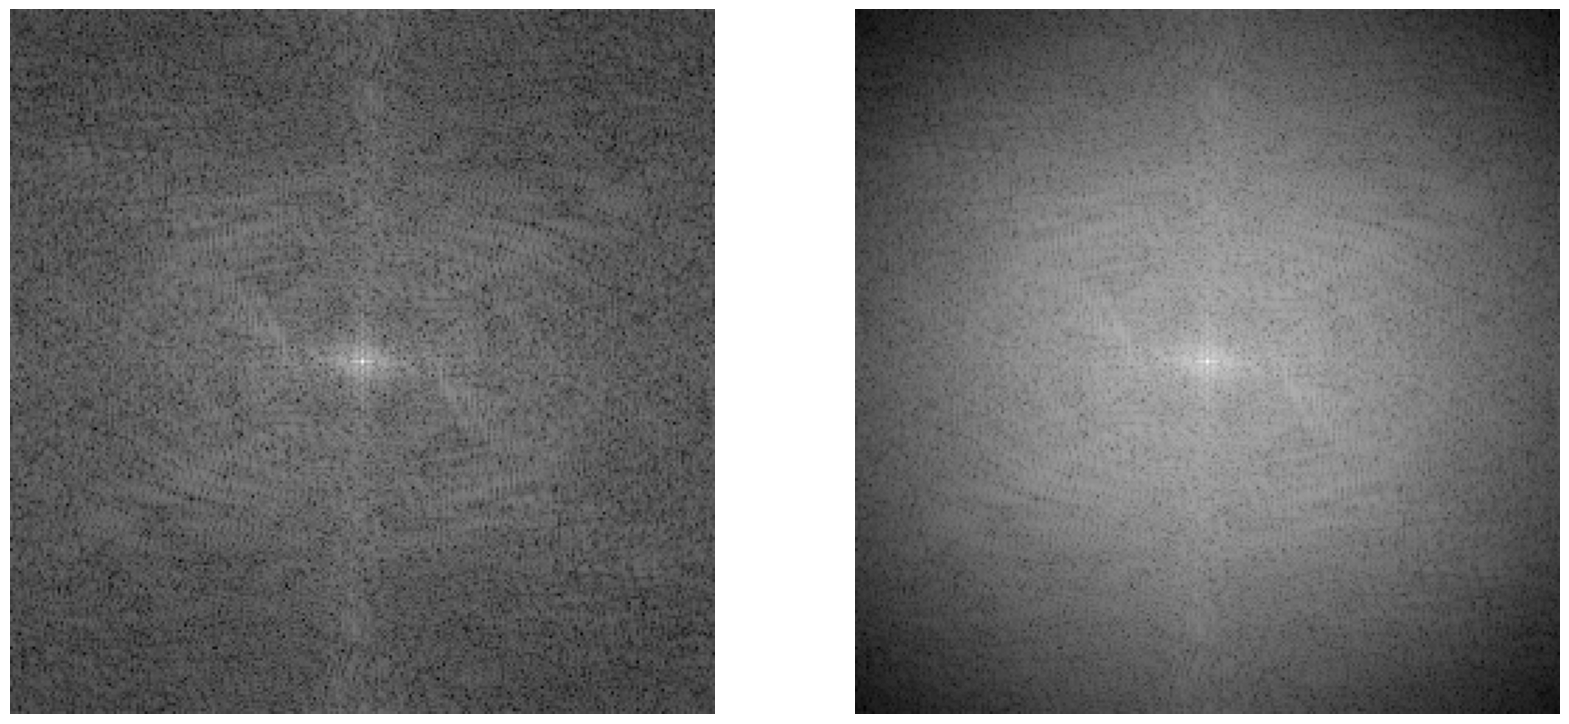

In [16]:
filtered_z = ifftshift(filt1) * fft2_zebras
f3, ax3 = plots(1, 2)
ax3[0].imshow(fftshift(abs(fft2_zebras)**0.03), cmap=GREY), ax3[0].axis('off')
ax3[1].imshow(fftshift(abs(filtered_z)**0.03), cmap=GREY), plt.axis('off')

plt.show()

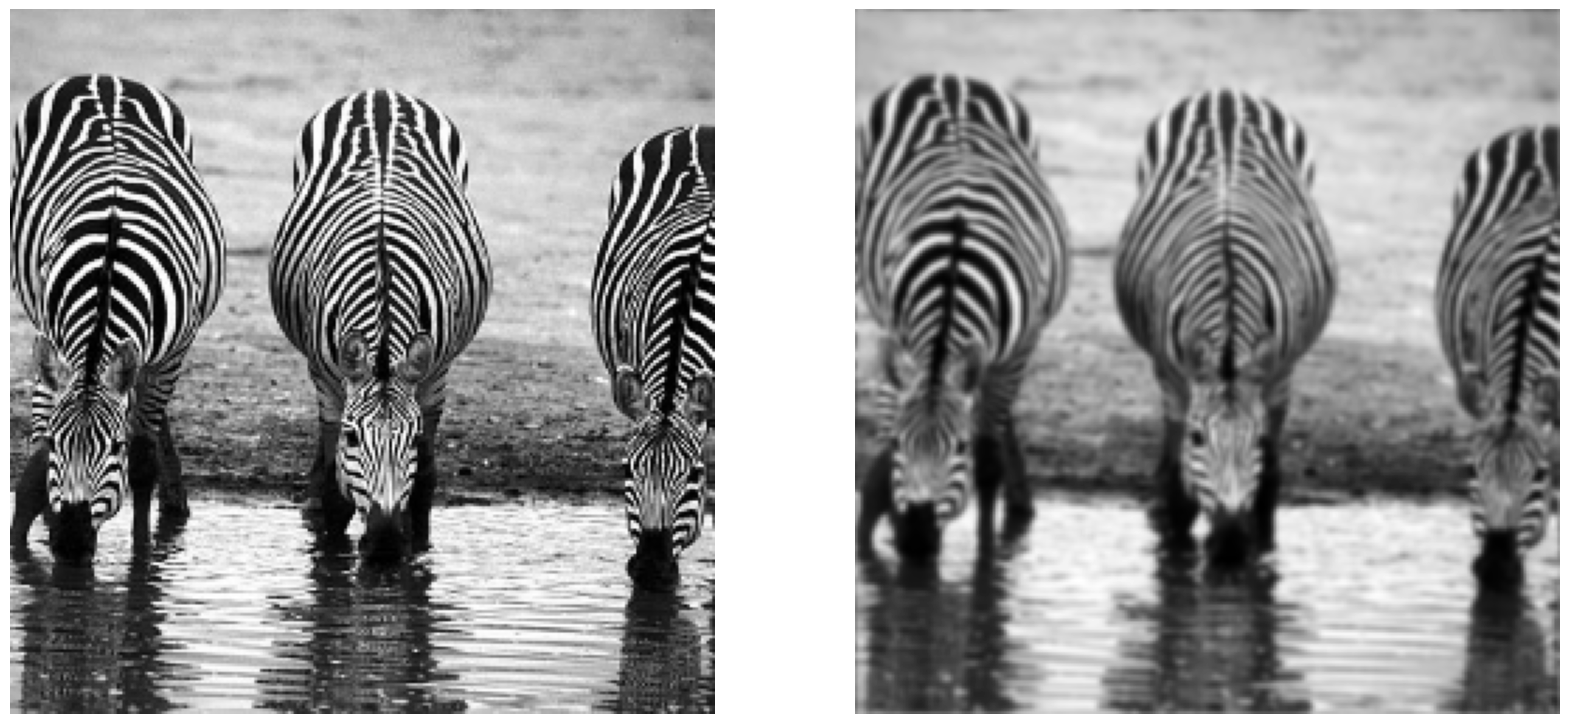

In [17]:
f3, ax3 = plots(1, 2)
ax3[0].imshow(zebras, cmap=GREY), ax3[0].axis('off')
ax3[1].imshow(ifft2(filtered_z).real, cmap=GREY), ax3[1].axis('off')

plt.show()

#### Basis Functions

In [18]:
#let us define some basic sinusoidals
fs = 1000 # sampling frequency
ts = 1/fs # sampling period
x = np.arange(fs) # create index array
n_x, n_y = np.meshgrid(x, x) # create meshgrid
f = 5 # simulated frequency
f2 = 100
sinusoidal_2D_5 = np.sin(2 * np.pi *f* n_x *ts)
sinusoidal_2D_5_v = np.sin(2 * np.pi *f* n_y *ts)
sinusoidal_5 = np.sin(2 * np.pi *f* x *ts )
sinusoidal_2D_100 = np.sin(2 * np.pi *f2* n_x *ts )
sinusoidal_2D_100_v = np.sin(2 * np.pi *f2* n_y *ts )
sinusoidal_100 = np.sin(2 * np.pi *f2* x *ts )

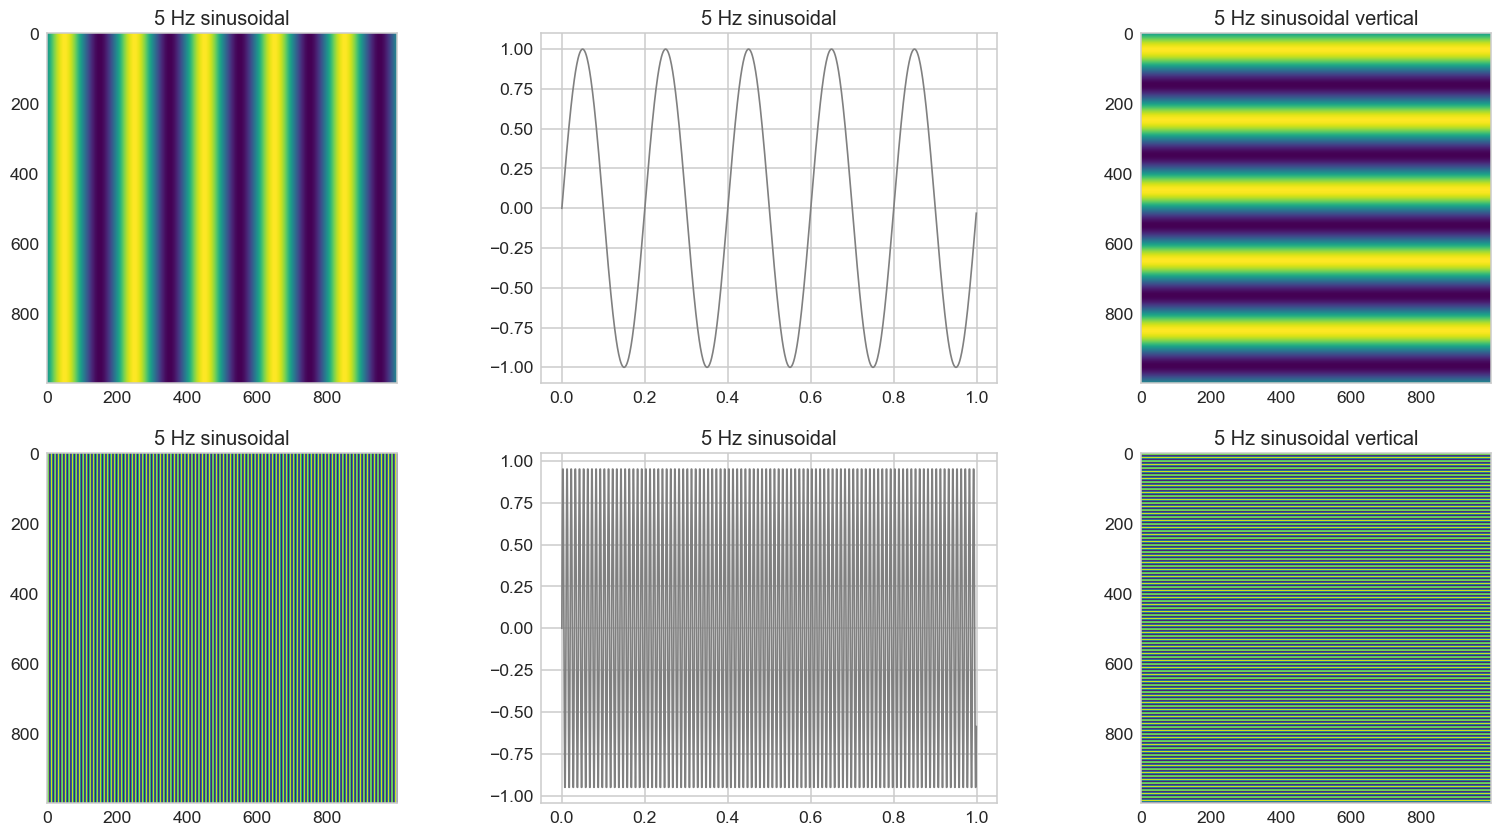

In [19]:
# Plot the results
# plt.set_cmap('gray')
f, ax = plots(2, 3)
ax[0,0].imshow(sinusoidal_2D_5), ax[0,0].set_title('5 Hz sinusoidal'), ax[0,0].grid(False)
ax[0,1].plot(x*ts,sinusoidal_5, color='gray'), ax[0,1].set_title('5 Hz sinusoidal')
ax[0,2].imshow(sinusoidal_2D_5_v), ax[0,2].set_title('5 Hz sinusoidal vertical'), ax[0,2].grid(False)

ax[1,0].imshow(sinusoidal_2D_100), ax[1,0].set_title('5 Hz sinusoidal'), ax[1,0].grid(False)
ax[1,1].plot(x*ts,sinusoidal_100, color='gray'), ax[1,1].set_title('5 Hz sinusoidal')
ax[1,2].imshow(sinusoidal_2D_100_v), ax[1,2].set_title('5 Hz sinusoidal vertical'), ax[1,2].grid(False)

plt.show()

#### FFT of basis

In [20]:
fft_sin_5 = fft2(sinusoidal_2D_5)
fft_sin_5_v = fft2(sinusoidal_2D_5_v)
fft_sin_100 = fft2(sinusoidal_2D_100)
fft_sin_100_v = fft2(sinusoidal_2D_100_v)


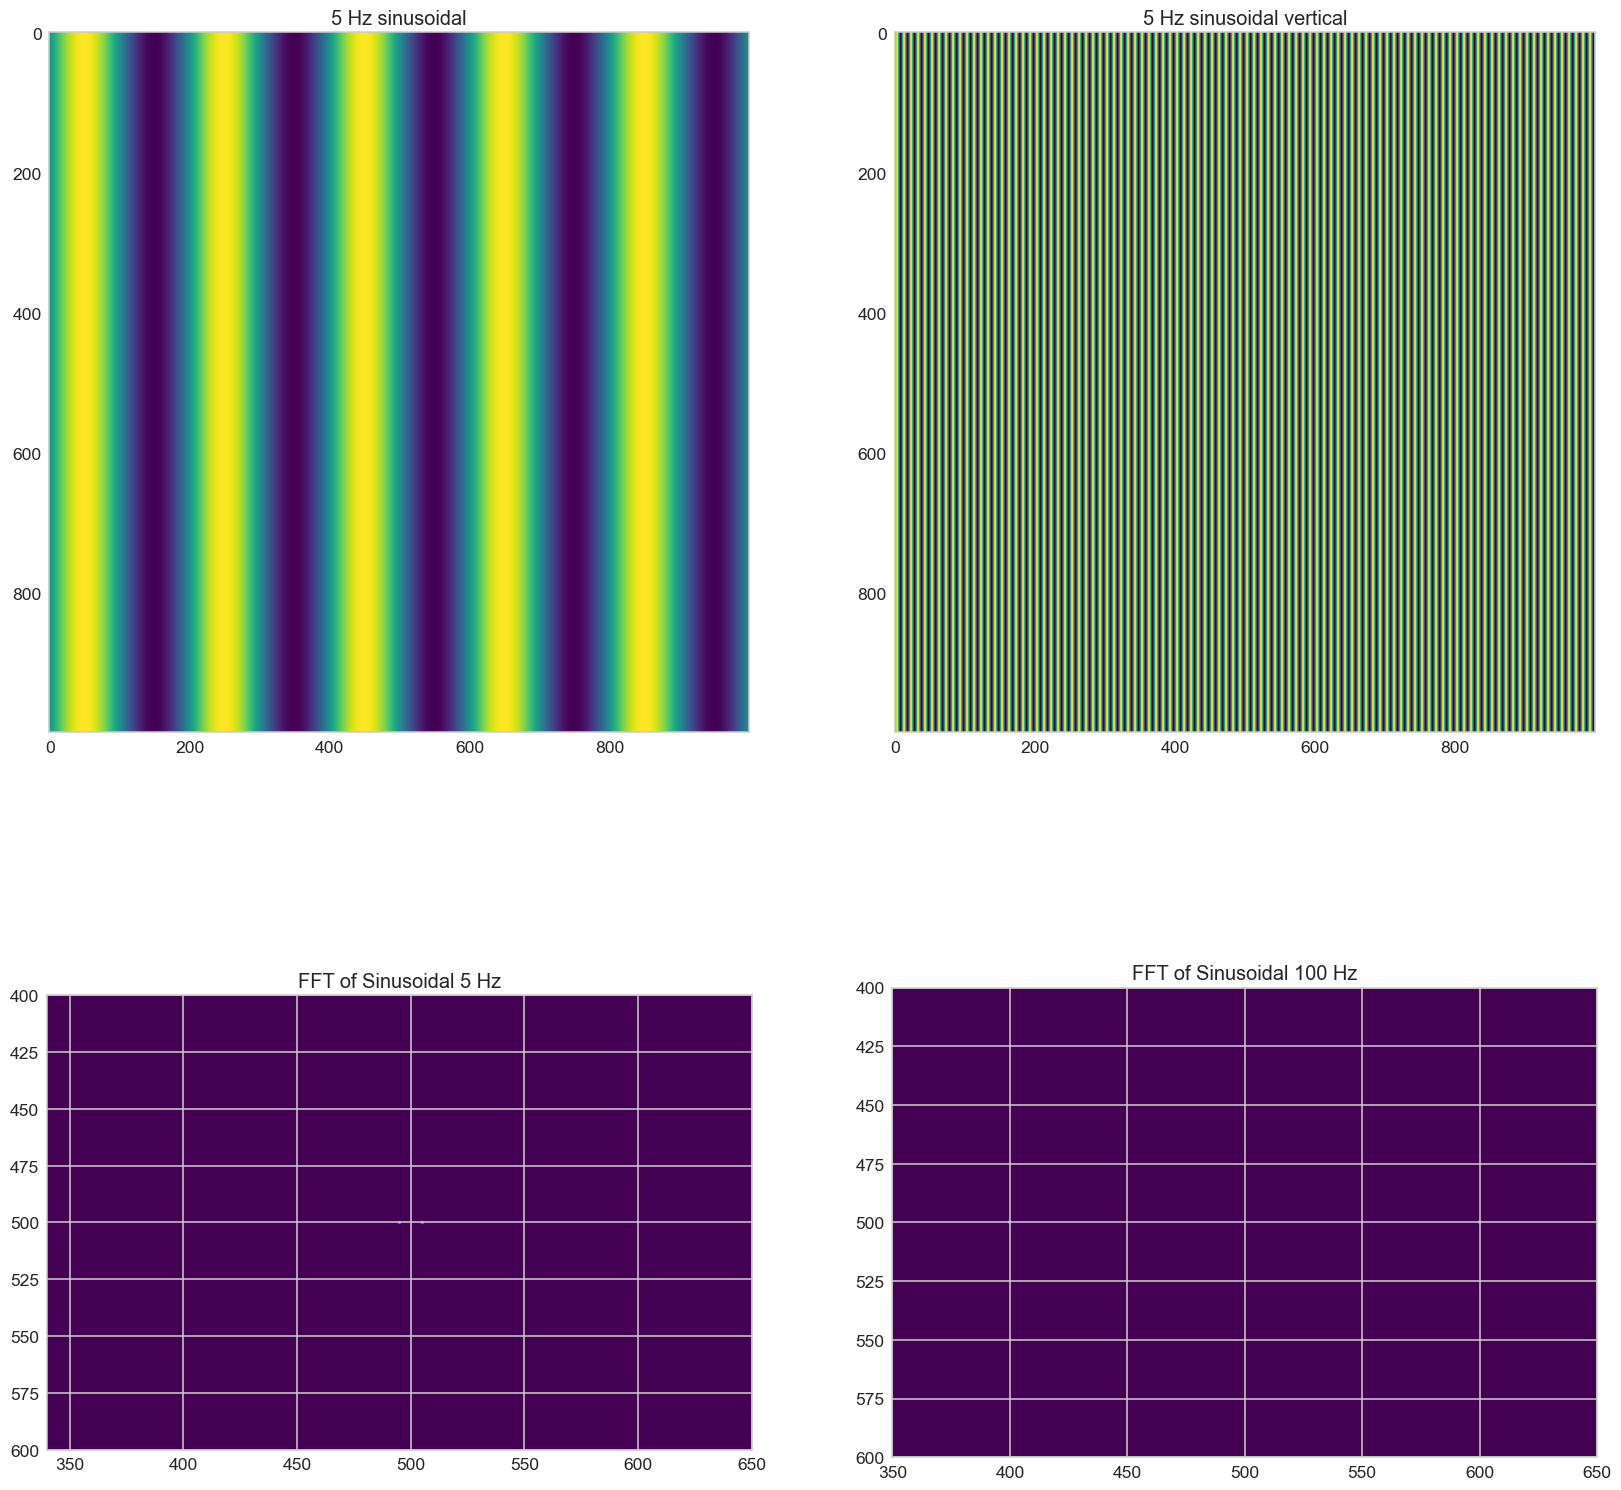

In [21]:
f, ax = plots(2, 2, figsize=(20,20))
ax[0,0].imshow(sinusoidal_2D_5), ax[0,0].set_title('5 Hz sinusoidal'), ax[0,0].grid(False)
ax[0,1].imshow(sinusoidal_2D_100), ax[0,1].set_title('5 Hz sinusoidal vertical'), ax[0,1].grid(False)

ax[1,0].imshow(fftshift(abs(fft_sin_5))), ax[1,0].set_title('FFT of Sinusoidal 5 Hz')
ax[1,0].set_xlim([340,650])
ax[1,0].set_ylim([600, 400])
ax[1,1].imshow(fftshift(abs(fft_sin_100))), ax[1,1].set_title('FFT of Sinusoidal 100 Hz')
ax[1,1].set_xlim([350,650])
ax[1,1].set_ylim([600, 400])


plt.show()

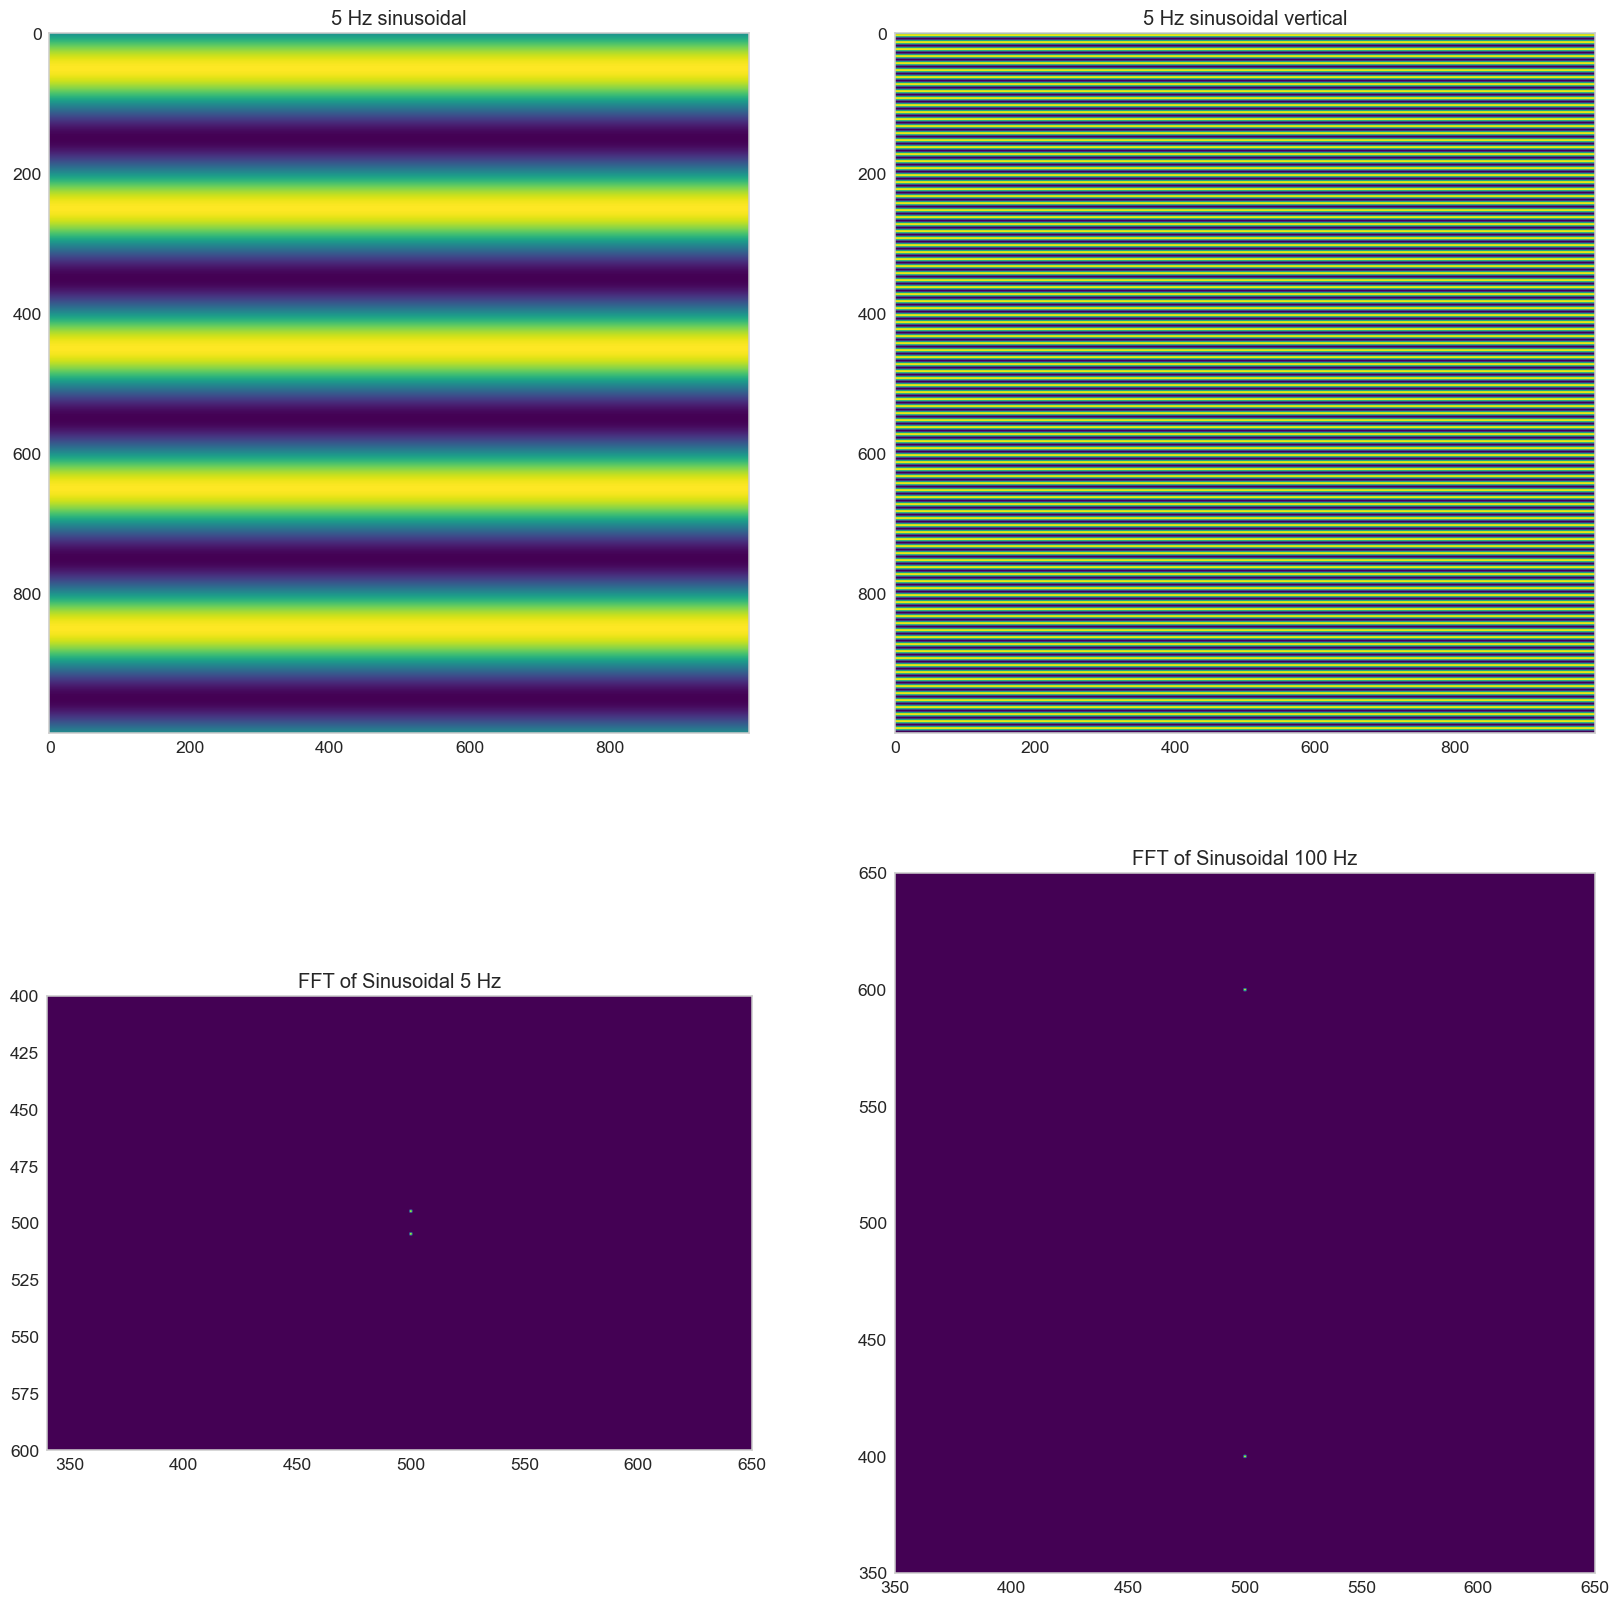

In [22]:
f, ax = plots(2, 2, figsize=(20,20))
ax[0,0].imshow(sinusoidal_2D_5_v), ax[0,0].set_title('5 Hz sinusoidal'), ax[0,0].grid(False)
ax[0,1].imshow(sinusoidal_2D_100_v), ax[0,1].set_title('5 Hz sinusoidal vertical'), ax[0,1].grid(False)

ax[1,0].imshow(fftshift(abs(fft_sin_5_v))), ax[1,0].set_title('FFT of Sinusoidal 5 Hz')
ax[1,0].grid(False)
ax[1,0].set_xlim([340,650])
ax[1,0].set_ylim([600, 400])
ax[1,1].imshow(fftshift(abs(fft_sin_100_v))), ax[1,1].set_title('FFT of Sinusoidal 100 Hz')
ax[1,1].grid(False)
ax[1,1].set_xlim([350,650])
ax[1,1].set_ylim([350, 650])


plt.show()

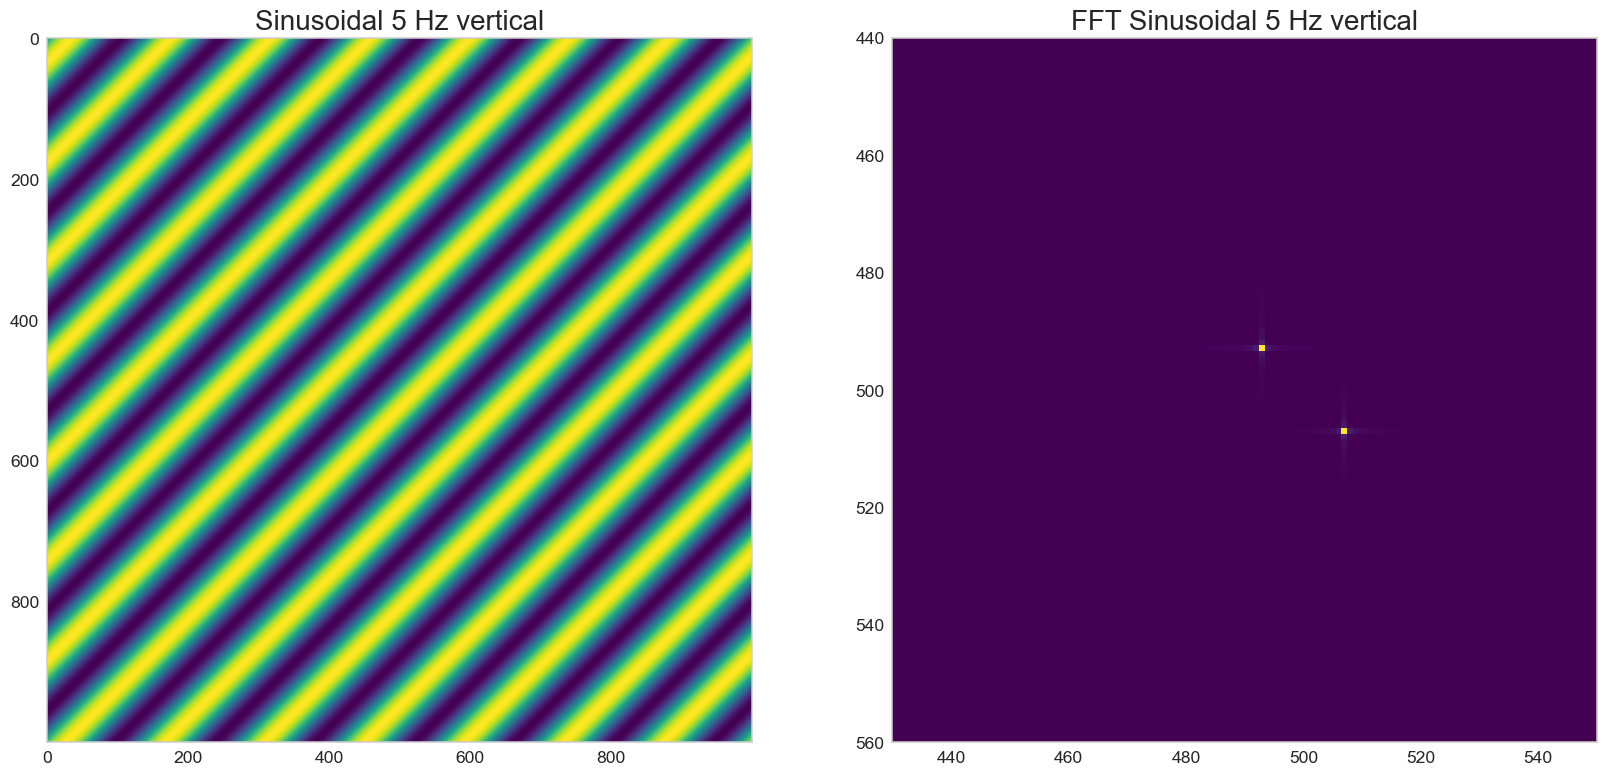

In [23]:
#let us define some basic sinusoidals, now with rotations
fs = 1000 # sampling frequency
ts = 1/fs # sampling period
x = np.arange(fs) # create index array
n_x, n_y = np.meshgrid(x, x) # create meshgrid
f = 10 # simulated frequency
f2 = 100
rotation_angle = 45*np.pi/180
n_x_rotated = n_x*np.cos(rotation_angle)
n_y_rotated = n_y*np.sin(rotation_angle)
#compute rotated sinusoidal
sin_2D_5_rot = np.sin(2 * np.pi *f* ts *(n_x_rotated+n_y_rotated ))
fft_sin_2D_5_rot = fft2((sin_2D_5_rot))
# fft_sin_2D_5_rot = fft2(ifftshift(sin_2D_5_rot))

# Show the rotated sinusoidal
f, ax = plots(1,2)
ax[0].imshow(sin_2D_5_rot), ax[0].grid(False), ax[0].set_title('Sinusoidal 5 Hz vertical', size=20)
ax[1].imshow(fftshift(abs(fft_sin_2D_5_rot))), ax[1].grid(False), ax[1].set_title('FFT Sinusoidal 5 Hz vertical', size=20)
ax[1].set_xlim([430, 550])
ax[1].set_ylim([560, 440])


plt.show()

#### Sinusoidals by addition

In [24]:
sin_5_plus_10 = sin_2D_5_rot + sinusoidal_2D_5
fft_sin_sum = fft2(sin_5_plus_10)



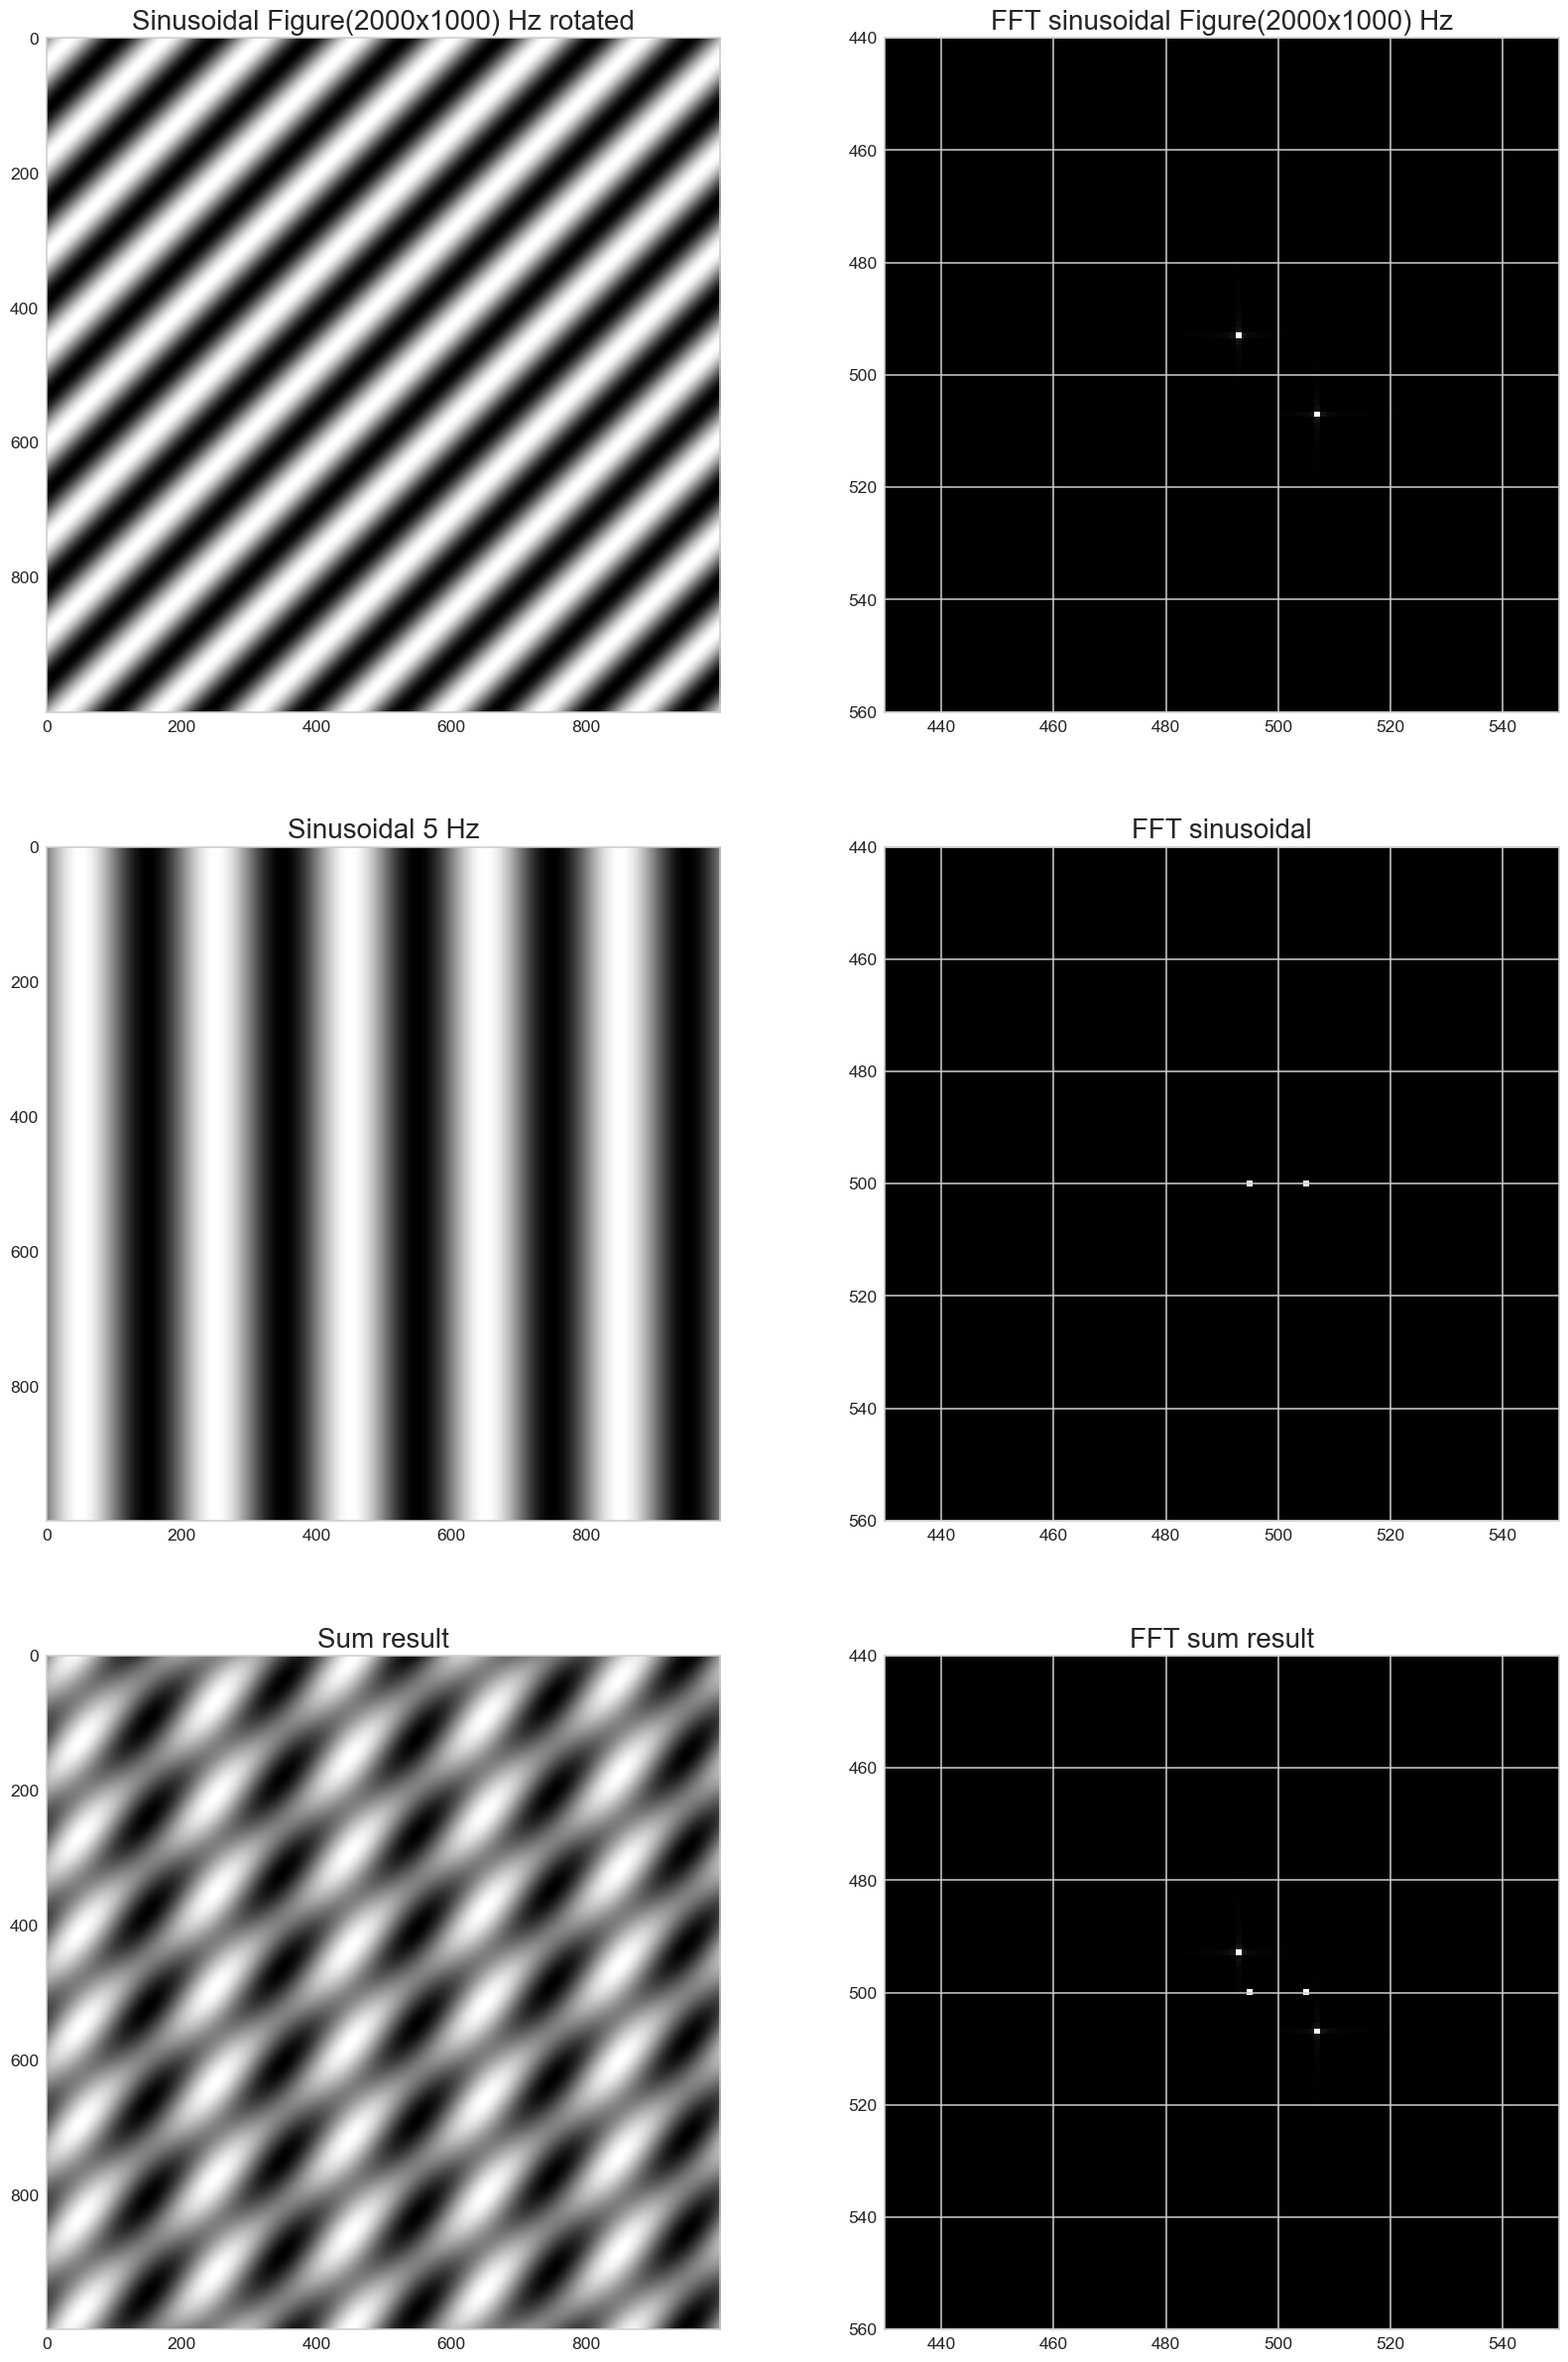

In [25]:
#Plotting stuff
plt.figure(figsize=(20,30))
plt.set_cmap('gray')

plt.subplot(321)
plt.imshow(sin_2D_5_rot), plt.grid(False), plt.title(f'Sinusoidal {f} Hz rotated', size=20)
plt.subplot(322)
plt.imshow(fftshift(abs(fft_sin_2D_5_rot))), plt.title(f'FFT sinusoidal {f} Hz', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(323)
plt.imshow(sinusoidal_2D_5), plt.grid(False), plt.title('Sinusoidal 5 Hz', size=20)
plt.subplot(324)
plt.imshow(fftshift(abs(fft_sin_5))), plt.title('FFT sinusoidal', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(325)
plt.imshow(sin_5_plus_10), plt.grid(False), plt.title('Sum result', size=20)
plt.subplot(326)
plt.imshow(fftshift(abs(fft_sin_sum))), plt.title('FFT sum result', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.show()

In [26]:
sin_5_plus_10_plus_5v = sin_2D_5_rot + sinusoidal_2D_5 + sinusoidal_2D_5_v
fft_sin_sum_3 = fft2(sin_5_plus_10_plus_5v)



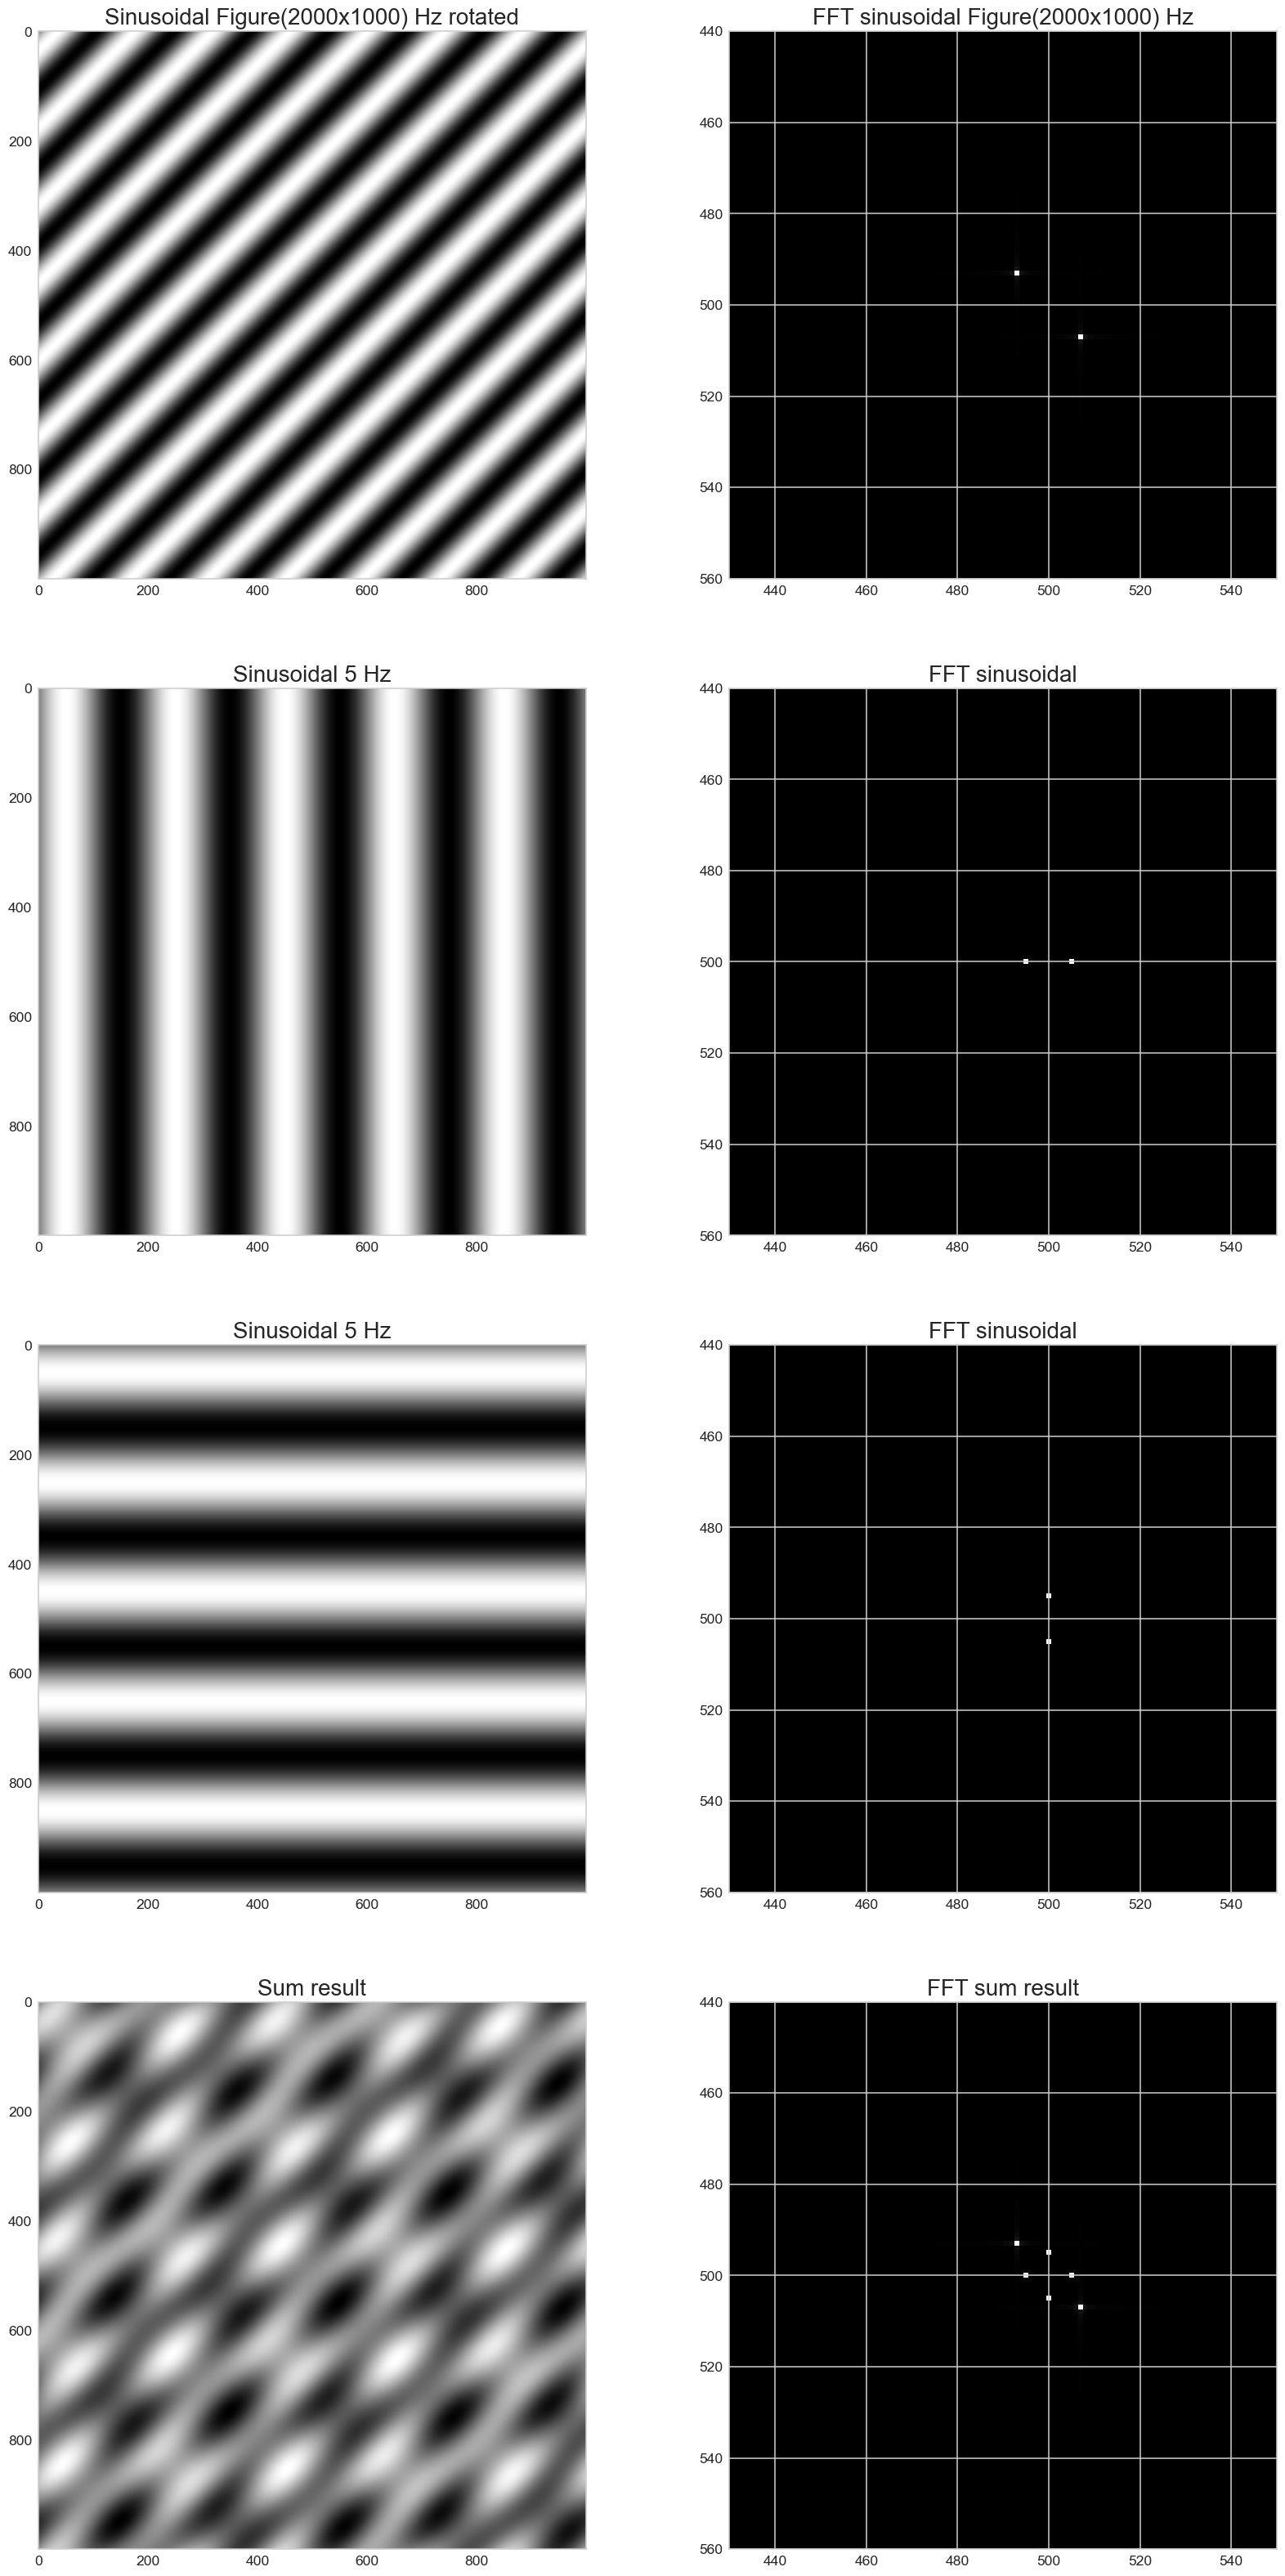

In [27]:
#plotting
plt.figure(figsize=(20,40))
plt.set_cmap('gray')

plt.subplot(421)
plt.imshow(sin_2D_5_rot), plt.grid(False), plt.title(f'Sinusoidal {f} Hz rotated', size=20)
plt.subplot(422)
plt.imshow(fftshift(abs(fft_sin_2D_5_rot))), plt.title(f'FFT sinusoidal {f} Hz', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(423)
plt.imshow(sinusoidal_2D_5), plt.grid(False), plt.title('Sinusoidal 5 Hz', size=20)
plt.subplot(424)
plt.imshow(fftshift(abs(fft_sin_5))), plt.title('FFT sinusoidal', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(425)
plt.imshow(sinusoidal_2D_5_v), plt.grid(False), plt.title('Sinusoidal 5 Hz', size=20)
plt.subplot(426)
plt.imshow(fftshift(abs(fft_sin_5_v))), plt.title('FFT sinusoidal', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(427)
plt.imshow(sin_5_plus_10_plus_5v), plt.grid(False), plt.title('Sum result', size=20)
plt.subplot(428)
plt.imshow(fftshift(abs(fft_sin_sum_3))), plt.title('FFT sum result', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.show()

In [28]:
#IFFT
ifft_sum_3 = ifft2(fft_sin_sum_3).real

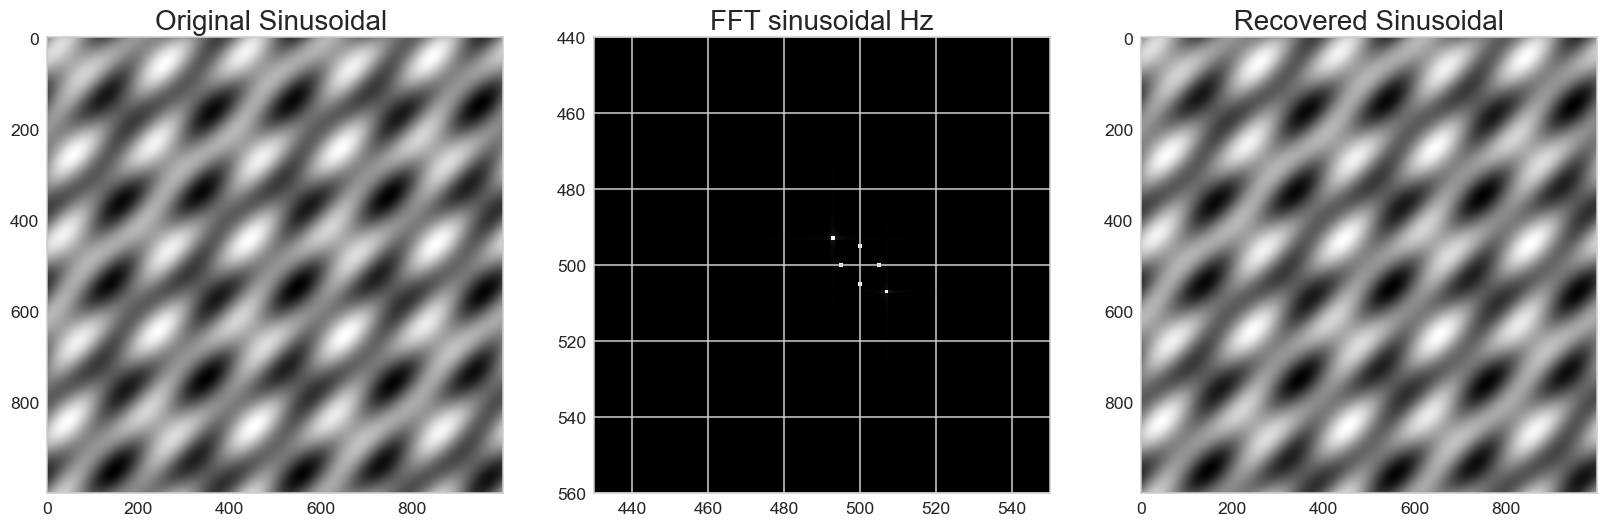

In [29]:
#IFFT plots


plt.figure(figsize = (20,15))
plt.set_cmap('gray')

plt.subplot(131)
plt.imshow(((sin_5_plus_10_plus_5v))), plt.title(f'Original Sinusoidal ', size=20), plt.grid(False)

plt.subplot(132)
plt.imshow(ifftshift(abs(fft_sin_sum_3))), plt.title(f'FFT sinusoidal Hz', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.subplot(133)
plt.imshow(((ifft_sum_3))), plt.title(f' Recovered Sinusoidal ', size=20), plt.grid(False)
plt.show()

In [30]:
#let us define some basic sinusoidals, now with rotations
fs = 1000 # sampling frequency
ts = 1/fs # sampling period
x = np.arange(fs) # create index array
n_x, n_y = np.meshgrid(x, x) # create meshgrid

A = [0.25, 0.5, 0.25, 1, 1, 1]
F = [4, 10, 8, 25, 15, 30]
angles = [10, 0, 90, 20, 45, 80]

sinusoidals=np.zeros(n_x.shape)
for a, f, ph in zip(A, F, angles):
    rot_angle = ph*np.pi/180
    rotated_grid = n_x*np.cos(rot_angle) + n_y*np.sin(rot_angle)
    sinusoidals += a*np.sin(2*np.pi*f*ts*rotated_grid)
# sinusoidals += .45 # optional adding a constant

fft_sin_2D_sums = fft2(sinusoidals)

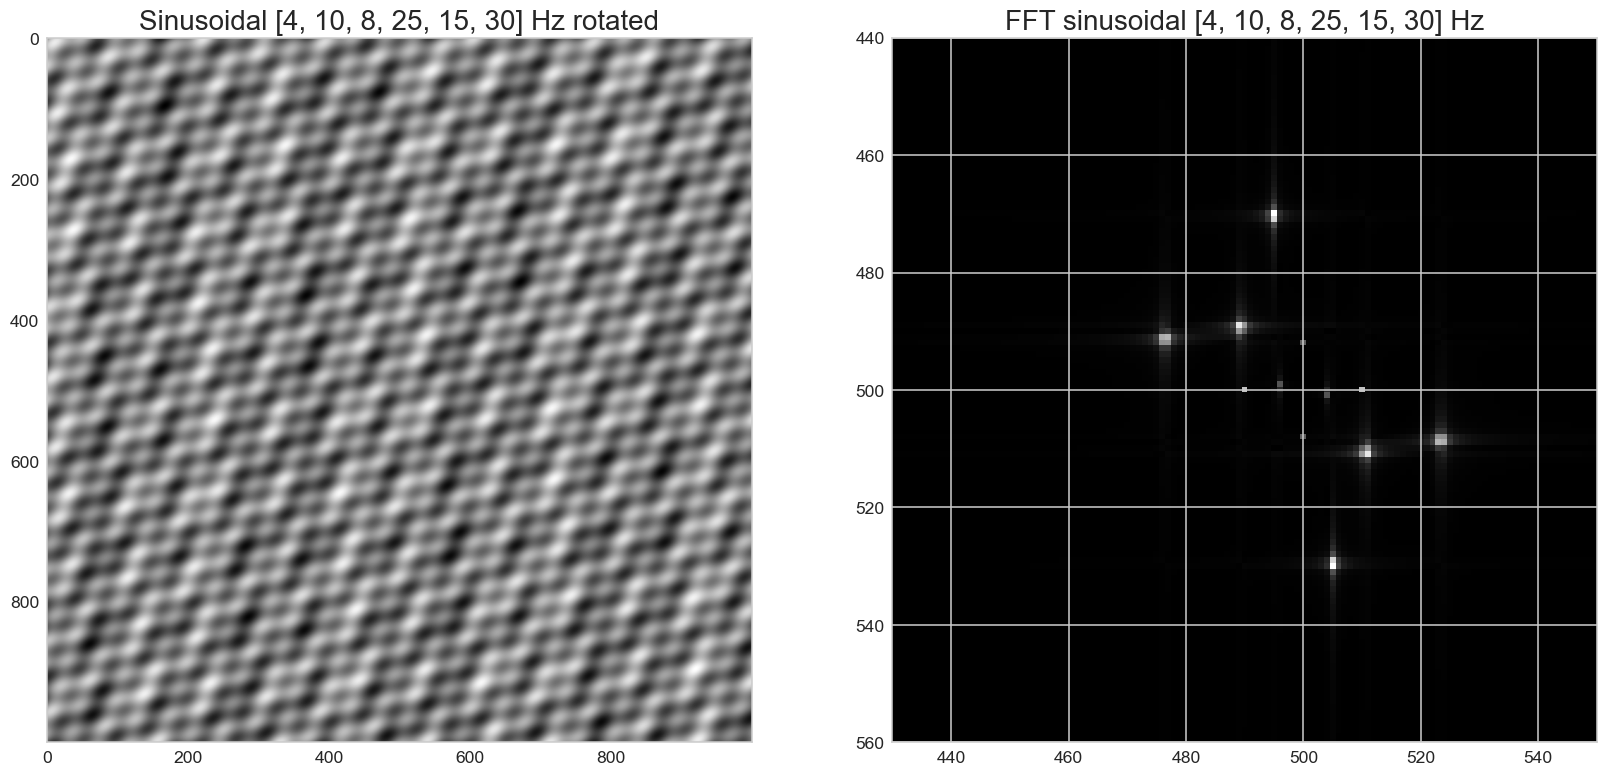

In [31]:
#plots

plt.figure(figsize = (20,10))
plt.set_cmap('gray')

plt.subplot(121)
plt.imshow(sinusoidals), plt.grid(False), plt.title(f'Sinusoidal {F} Hz rotated', size=20)
plt.subplot(122)
plt.imshow(fftshift(abs(fft_sin_2D_sums))), plt.title(f'FFT sinusoidal {F} Hz', size=20)
plt.xlim([430, 550])
plt.ylim([560, 440])

plt.show()

In [ ]:
#Bastián Andrés Carrasco Espinoza A01761668
#Samantha Daniela Guanipa Ugas A01703936
#Cesar Alonso Álvarez Rojas A01761589
#Carlos Nicolás Ávila Amigo A01761673
#Edgar Alexander Carrizalez Lerín A01024901

In [32]:
def gradient_image (img):
    gx = np.gradient(img, axis=1)
    gy = np.gradient(img, axis=0)
    
    gm = np.sqrt(gx**2 + gy**2)
    gm = (gm - np.min(gm)) / (np.max(gm) - np.min(gm)) * 255
    
    magnitud = np.linalg.norm(gm)
    
    plt.imshow(gm, cmap='gray')
    plt.axis('off')
    plt.show()
    print("Magnitud: " + str(magnitud))

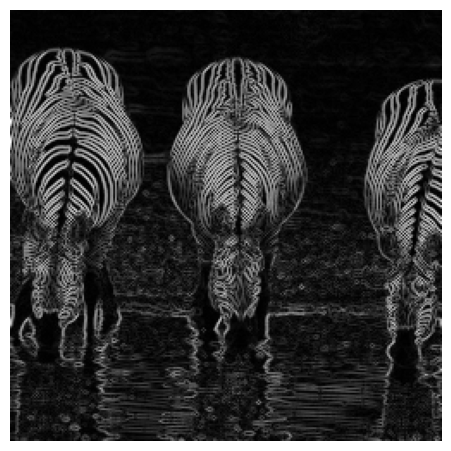

Magnitud: 15901.631554455462


In [33]:
gradient_image (zebras)